<a href="https://colab.research.google.com/github/rokeya160210/Assignment1/blob/main/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.Gender = le.fit_transform(df[['Gender']])

In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [8]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0


 Separate X (Gender, Height) and Y (y=Weight).

In [9]:
x = df.drop(['Weight'], axis=1)

In [10]:
x.head(3)

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105


In [11]:
y = df.drop(['Gender','Height'], axis=1)

In [12]:
y.head(3)

,Weight
0,241.893563
1,162.310473
2,212.740856


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

Train = 70%, Test = 30%

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

Apply Linear Regression  

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
y_pred = model.predict(xtest)

In [19]:
y_pred

array([[156.20235428],
       [184.93442898],
       [148.42945323],
       ...,
       [159.2442037 ],
       [166.96403181],
       [136.95529212]])

 Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [20]:
mse_lr = mean_squared_error(ytest, y_pred)
print('MSE:', mse_lr)

MSE: 102.30154155088874


In [21]:
train_r2_lr = model.score(xtrain, ytrain)# train data -> training accuracy

In [22]:
test_r2_lr = model.score(xtest, ytest)# test data -> testing accuracy

 Apply KNN Regressor: Scikit-Learn Link

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(xtrain, ytrain)

KNeighborsRegressor()

Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [25]:
# Training accuracy (R²)
train_r2_knn = knn_model.score(xtrain, ytrain)

In [26]:
# Testing accuracy (R²)
test_r2_knn = knn_model.score(xtest, ytest)

In [27]:
# Mean Squared Error (MSE) on Test
y_pred_knn = knn_model.predict(xtest)
mse_knn = mean_squared_error(ytest, y_pred_knn)

In [28]:
print(f"KNN Train R²: {train_r2_knn:.4f}")
print(f"KNN Test R²: {test_r2_knn:.4f}")
print(f"KNN Test MSE: {mse_knn:.4f}")

KNN Train R²: 0.9185
KNN Test R²: 0.8806
KNN Test MSE: 125.3308


 Compare KNN & Linear Regression with the KNN Model and Linear regression as well.

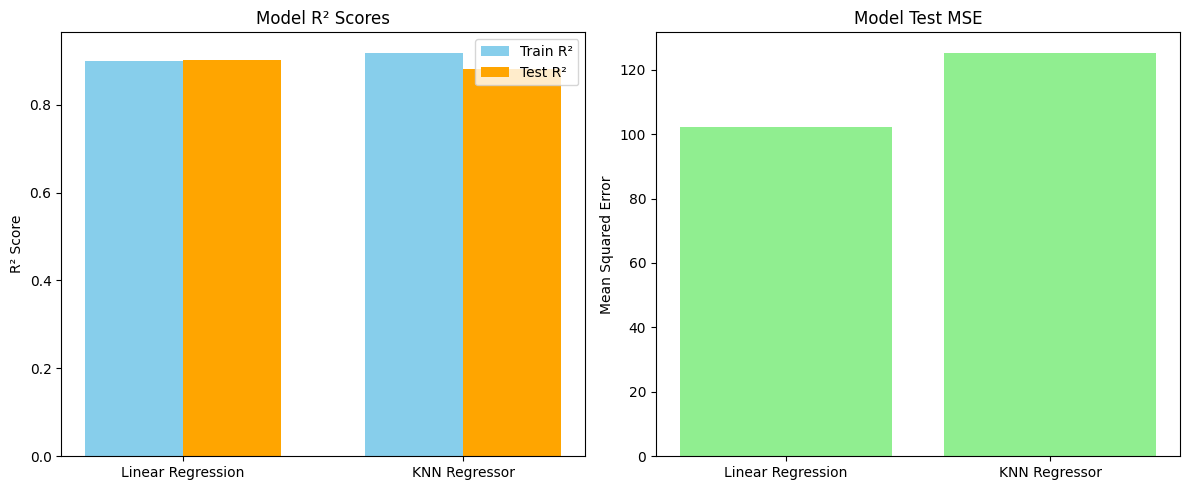

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# R² Scores
models = ['Linear Regression', 'KNN Regressor']
train_scores = [train_r2_lr, train_r2_knn]
test_scores = [test_r2_lr, test_r2_knn]

# MSE Scores
test_mse = [mse_lr, mse_knn]

# Plotting R² Scores
x = np.arange(len(models))  # X-axis positions
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# R² Bar Plot
axs[0].bar(x - width/2, train_scores, width, label='Train R²', color='skyblue')
axs[0].bar(x + width/2, test_scores, width, label='Test R²', color='orange')
axs[0].set_ylabel('R² Score')
axs[0].set_title('Model R² Scores')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()

# MSE Bar Plot
axs[1].bar(models, test_mse, color='lightgreen')
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_title('Model Test MSE')

plt.tight_layout()
plt.show()


# **KNN for Classification**

 Import data set  
2. Separate X and Y. (y=Gender)  
3. Train = 70%, Test = 30%

In [35]:
df2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/weight-height.csv')
df2.head()
x = df2.drop(['Gender'], axis=1)
y = df2.drop(['Weight','Height'], axis=1)
X_train, X_test, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

In [32]:
xtrain.head()

,Height,Weight
3197,69.689848,186.377448
4394,66.299441,159.235988
7711,63.261527,126.426793
7019,62.035319,119.418135
898,67.272171,187.363366


In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Feature Scaling (Important for KNN-

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Apply KNN Classifier  

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)  # Here k=5
knn.fit(X_train, ytrain)


KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test)


In [40]:
y_pred

array(['Male', 'Male', 'Female', ..., 'Male', 'Male', 'Female'],
      dtype=object)

 Evaluate the Model by only Accuracy

In [44]:
print("Accuracy:", accuracy_score(ytest, y_pred))


Accuracy: 0.9088430074016361
